In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split


In [144]:
df = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")

In [145]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [146]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
np.random.seed(42)

# Calculate number of missing values (~5% of rows)
n_missing = int(0.05 * len(df))

# Random indices for sqft_lot
sqft = np.random.choice(df.index, n_missing, replace=False)
df.loc[sqft, 'sqft_lot'] = np.nan

# Random indices for bathroom
bathroom = np.random.choice(df.index, n_missing, replace=False)
df.loc[bathroom, 'bathroom'] = np.nan


df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [148]:
df.shape

(21613, 21)

In [149]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

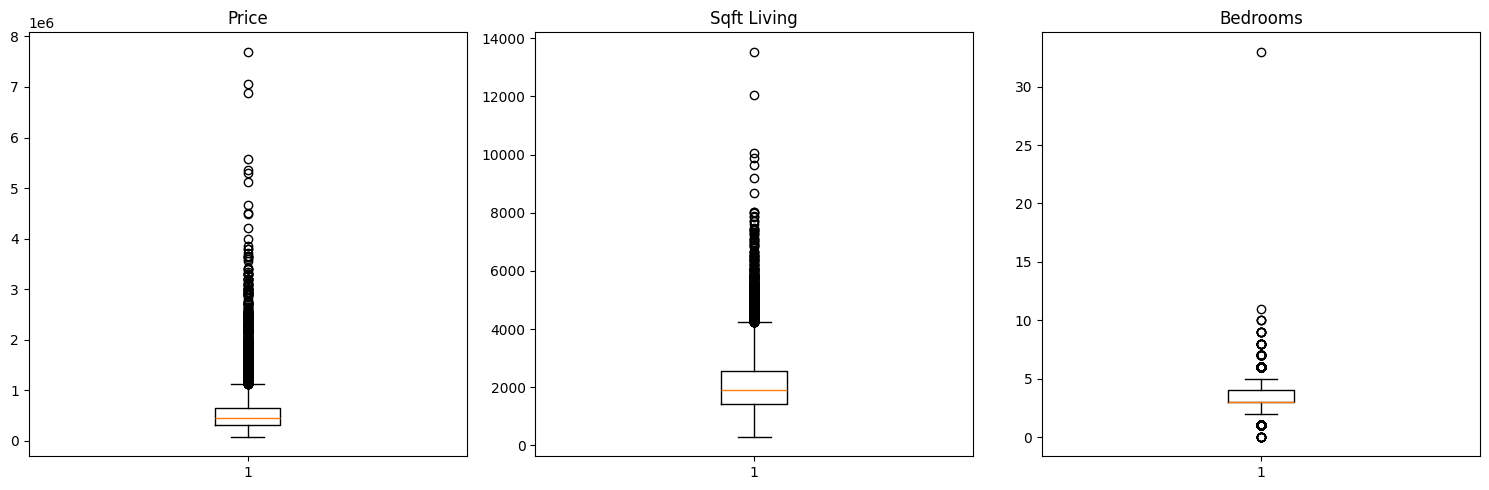

In [150]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(df['price'].dropna())
plt.title("Price")

plt.subplot(1,3,2)
plt.boxplot(df['sqft_living'].dropna())
plt.title("Sqft Living")

plt.subplot(1,3,3)
plt.boxplot(df['bedrooms'].dropna())
plt.title("Bedrooms")

plt.tight_layout()
plt.show()

In [161]:
def check_outlier(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 0.25 * IQR
    upper_bound = Q3 + 0.75 * IQR


    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


print("before removing:", df.shape)
price_outlier = check_outlier(df ,'price')
print("After removing:", price_outlier.shape)

sqft_living_outlier = check_outlier(df,'sqft_living')
bedroom_outlier = check_outlier(df,'bedrooms')





before removing: (21613, 21)
After removing: (17436, 21)


In [162]:
price_outlier.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


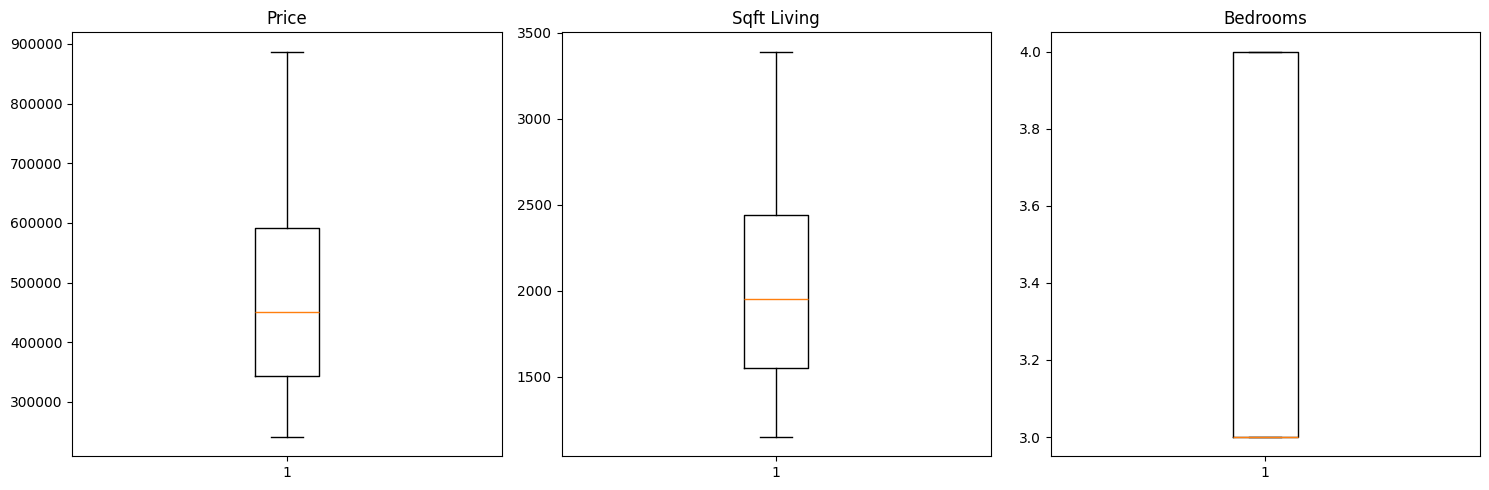

In [165]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(price_outlier['price'])
plt.title("Price")

plt.subplot(1,3,2)
plt.boxplot(sqft_living_outlier['sqft_living'])
plt.title("Sqft Living")

plt.subplot(1,3,3)
plt.boxplot(bedroom_outlier['bedrooms'])
plt.title("Bedrooms")

plt.tight_layout()
plt.show()

In [166]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [173]:
df['date_formatted'] = pd.to_datetime(df['date'])

df['sale-year'] = df['date_formatted'].dt.year
df['sale-month'] = df['date_formatted'].dt.month

In [174]:
df.dtypes

id                         int64
date                      object
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
date_formatted    datetime64[ns]
sale-year                  int32
sale-month                 int32
dtype: object

In [175]:
df['house_age'] = df['sale-year'] - df['yr_built']

In [178]:
df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_formatted,sale-year,sale-month,house_age,was_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10,59,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014-12-09,2014,12,63,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2,82,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014-12-09,2014,12,49,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2,28,0


In [ ]:
df['house_renovation'] = np.where(
    df['yr_renovated'] != 0,  
    pd.to_datetime(df['date']).dt.year - df['yr_renovated'],
    df['house_age']   
)


In [182]:
df['house_renovation']

0        59
1        23
2        82
3        49
4        28
         ..
21608     5
21609     1
21610     5
21611    11
21612     6
Name: house_renovation, Length: 21613, dtype: int64

In [190]:
df['sqft_living_per_floor'] = df['sqft_living'] / df['floors']
df.loc[df['floors'] == 0, 'sqft_living_per_floor'] = None

df['bath_per_bed'] = df['bathrooms'] / df['bedrooms']
df.loc[df['bedrooms'] == 0 , 'bath_per_bed'] = 0

In [191]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,date_formatted,sale-year,sale-month,house_age,was_renovated,house_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1340,5650,2014-10-13,2014,10,59,0,59,1180.0,0.333333
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1690,7639,2014-12-09,2014,12,63,1,23,1285.0,0.750000
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,2720,8062,2015-02-25,2015,2,82,0,82,770.0,0.500000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,2014-12-09,2014,12,49,0,49,1960.0,0.750000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1800,7503,2015-02-18,2015,2,28,0,28,1680.0,0.666667


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     21613 non-null  int64         
 1   date                   21613 non-null  object        
 2   price                  21613 non-null  float64       
 3   bedrooms               21613 non-null  int64         
 4   bathrooms              21613 non-null  float64       
 5   sqft_living            21613 non-null  int64         
 6   sqft_lot               21613 non-null  int64         
 7   floors                 21613 non-null  float64       
 8   waterfront             21613 non-null  int64         
 9   view                   21613 non-null  int64         
 10  condition              21613 non-null  int64         
 11  grade                  21613 non-null  int64         
 12  sqft_above             21613 non-null  int64         
 13  s

Task 2

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [194]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,date_formatted,sale-year,sale-month,house_age,was_renovated,house_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1340,5650,2014-10-13,2014,10,59,0,59,1180.0,0.333333
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1690,7639,2014-12-09,2014,12,63,1,23,1285.0,0.750000
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,2720,8062,2015-02-25,2015,2,82,0,82,770.0,0.500000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,2014-12-09,2014,12,49,0,49,1960.0,0.750000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1800,7503,2015-02-18,2015,2,28,0,28,1680.0,0.666667


In [196]:
df.isnull().sum()

id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
date_formatted           0
sale-year                0
sale-month               0
house_age                0
was_renovated            0
house_renovation         0
sqft_living_per_floor    0
bath_per_bed             0
dtype: int64

In [224]:
X = df.drop(['id' , 'date' , 'price' , 'date_formatted'], axis=1)
y = df['price']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['zipcode']
passthrough_features = df[['waterfront' , 'view' , 'condition' , 'grade' , 'yr_built' , 'yr_renovated' , 'lat' , 'long' , 'date_formatted' , 'was_renovated' , 'house_renovation' , 'bath_per_bed']]


In [225]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [226]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Step 1: Handle missing values
    ('scaler', StandardScaler())                    # Step 2: Scale features
])


df[numeric_features] = numeric_pipeline.fit_transform(df[numeric_features])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

encoded_zipcode = categorical_pipeline.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_zipcode.toarray(), columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_features))
df_encoded = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', LinearRegression())        
])

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.3 , random_state= 42)




In [227]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from math import sqrt
import joblib

In [228]:
final_pipelines = {
    'GradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(random_state=42, objective='reg:squarederror'))
    ])

}


In [229]:
baseline_results = []

for name, pipeline in final_pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    baseline_results.append([name, r2, mae, rmse])
    print(f"{name}: R² = {r2:.4f}, MAE = {mae:.2f}, RMSE = {rmse:.2f}")

baseline_df = pd.DataFrame(baseline_results, columns=["Model", "R²", "MAE", "RMSE"])
print("\nBaseline Results:\n", baseline_df)

param_grids = {
    'GradientBoosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1]
    },
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6]
    }
}

best_models = {}
print("\n===== Hyperparameter Tuning =====")
for name, pipeline in final_pipelines.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=3,
        scoring='r2',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    print(f"Best Params for {name}: {grid_search.best_params_}")
    print(f"Best CV Score: {grid_search.best_score_:.4f}")

    best_models[name] = grid_search.best_estimator_


print("\n===== Final Tuned Model Performance =====")
final_results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    final_results.append([name, r2, mae, rmse])
    print(f"{name}: R² = {r2:.4f}, MAE = {mae:.2f}, RMSE = {rmse:.2f}")

final_df = pd.DataFrame(final_results, columns=["Model", "R²", "MAE", "RMSE"])
print("\nTuned Model Results:\n", final_df)

best_model_name = final_df.sort_values(by="R²", ascending=False).iloc[0]["Model"]
best_model = best_models[best_model_name]


joblib.dump(best_model, f"best_model_{best_model_name}.pkl")
print(f"\nBest model saved as best_model_{best_model_name}.pkl")

GradientBoosting: R² = 0.8656, MAE = 0.21, RMSE = 0.38
RandomForest: R² = 0.8537, MAE = 0.20, RMSE = 0.40
XGBoost: R² = 0.8588, MAE = 0.19, RMSE = 0.39

Baseline Results:
               Model        R²       MAE      RMSE
0  GradientBoosting  0.865582  0.213913  0.379450
1      RandomForest  0.853683  0.200414  0.395890
2           XGBoost  0.858846  0.189060  0.388842

===== Hyperparameter Tuning =====

Tuning GradientBoosting...
Best Params for GradientBoosting: {'model__learning_rate': 0.1, 'model__n_estimators': 200}
Best CV Score: 0.8737

Tuning RandomForest...
Best Params for RandomForest: {'model__max_depth': 20, 'model__n_estimators': 200}
Best CV Score: 0.8604

Tuning XGBoost...
Best Params for XGBoost: {'model__max_depth': 3, 'model__n_estimators': 200}
Best CV Score: 0.8874

===== Final Tuned Model Performance =====
GradientBoosting: R² = 0.8796, MAE = 0.20, RMSE = 0.36
RandomForest: R² = 0.8572, MAE = 0.20, RMSE = 0.39
XGBoost: R² = 0.8658, MAE = 0.19, RMSE = 0.38

Tuned Mo